In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
import matplotlib as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
non_fraud = df[df["Class"]==0]
fraud = df[df["Class"]==1]
#non_fraud = non_fraud.sample(2*fraud.shape[0])
non_fraud = non_fraud.sample(fraud.shape[0])
data = fraud.append(non_fraud,ignore_index=True)
x_data = data.drop(columns="Class",axis=0)
label = data["Class"]

In [ ]:
train_data,test_data,train_label,test_label= train_test_split(x_data,label,test_size=0.3,random_state=42,stratify=label)

In [ ]:
mean=train_data.loc[:,['Time','Amount']].mean(axis=0)
train_data.loc[:,['Time','Amount']] -= mean
std = train_data.loc[:,['Time','Amount']].std(axis=0)
train_data.loc[:,['Time','Amount']] /= std
test_data.loc[:,['Time','Amount']] -= mean
test_data.loc[:,['Time','Amount']] /= std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.

In [ ]:
#print(train.shape)
#print(test.shape)
train_label = np.asarray(train_label).astype(dtype="float64")
test_label = np.array(test_label).astype(dtype="float64")

In [ ]:
test_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [ ]:
#Build Model
from keras import models,layers
model = models.Sequential()
model.add(layers.Dense(20,activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10,activation='relu',))
model.add(layers.Dense(8,activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,train_label,epochs=100,validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.6275 - accuracy: 0.6201 - val_loss: 0.5558 - val_accuracy: 0.6449
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.6639 - val_loss: 0.4900 - val_accuracy: 0.6739
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4879 - accuracy: 0.7315 - val_loss: 0.4440 - val_accuracy: 0.7319
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4390 - accuracy: 0.8044 - val_loss: 0.4089 - val_accuracy: 0.8188
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8756 - val_loss: 0.3725 - val_accuracy: 0.9130
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.9002 - val_loss: 0.3273 - val_accuracy: 0.9203
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.9210 - val_loss: 0.2666 - val_accuracy: 0.9203
Epoch 8/100


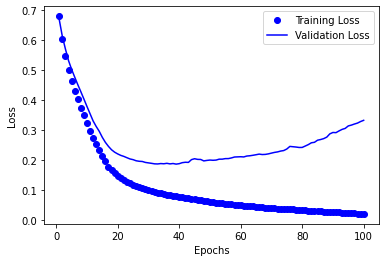

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()




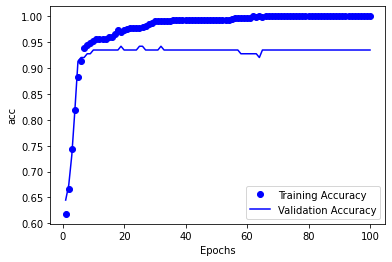

In [ ]:
acc= history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,"bo",label="Training Accuracy")
plt.plot(epochs,val_accuracy,"b",label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()



In [ ]:
loss,accuracy=model.evaluate(test_data,test_label)

10/10 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.9324


In [ ]:
model.predict(np.array(test_data.iloc[1,:]).reshape(1,test_data.shape[1]))

array([[9.1027755e-07]], dtype=float32)

In [ ]:
prediction = model.predict(test_data).astype(dtype="u8")

In [ ]:
prediction[30:45]

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]], dtype=uint64)

In [ ]:
test_label[30:45]

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.])